## Importing Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"./FedCycleData071012 (2).csv")
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


## EDA And Data Cleaning:

In [3]:
df.shape

(1665, 80)

In [4]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n \n")

ClientID : 
 ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nf

## Check and Replace any Missing values with nan

In [5]:
df.isnull().sum()

ClientID                0
CycleNumber             0
Group                   0
CycleWithPeakorNot      0
ReproductiveCategory    0
                       ..
NextpregM               0
Spousesame              0
SpousesameM             0
Timeattemptpreg         0
BMI                     0
Length: 80, dtype: int64

In [6]:
df= df.replace(' ',np.nan)
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,NaN,NaN,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,NaN,15,12,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nfp8122,3,0,1,0,29,NaN,15,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nfp8122,4,0,1,0,27,NaN,15,12,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nfp8122,5,0,1,0,28,NaN,16,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking if any missing values:

In [7]:
cols_with_missing_cols= []
cols_without_missing_values = []
for cols in df.columns:   
    if df[cols].isnull().sum() == 0:
        cols_without_missing_values.append(cols)
        
    else:
        cols_with_missing_cols.append(cols)
        
print(f'Number of Columns without any missing values:  {len(cols_without_missing_values)}\n')
print(f'Number of Columns with missing values :  {len(cols_with_missing_cols)}')

Number of Columns without any missing values:  6

Number of Columns with missing values :  74


- <b>Note: There are 74 columns with missing values</b>

### Handling Missing Values:

In [8]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})

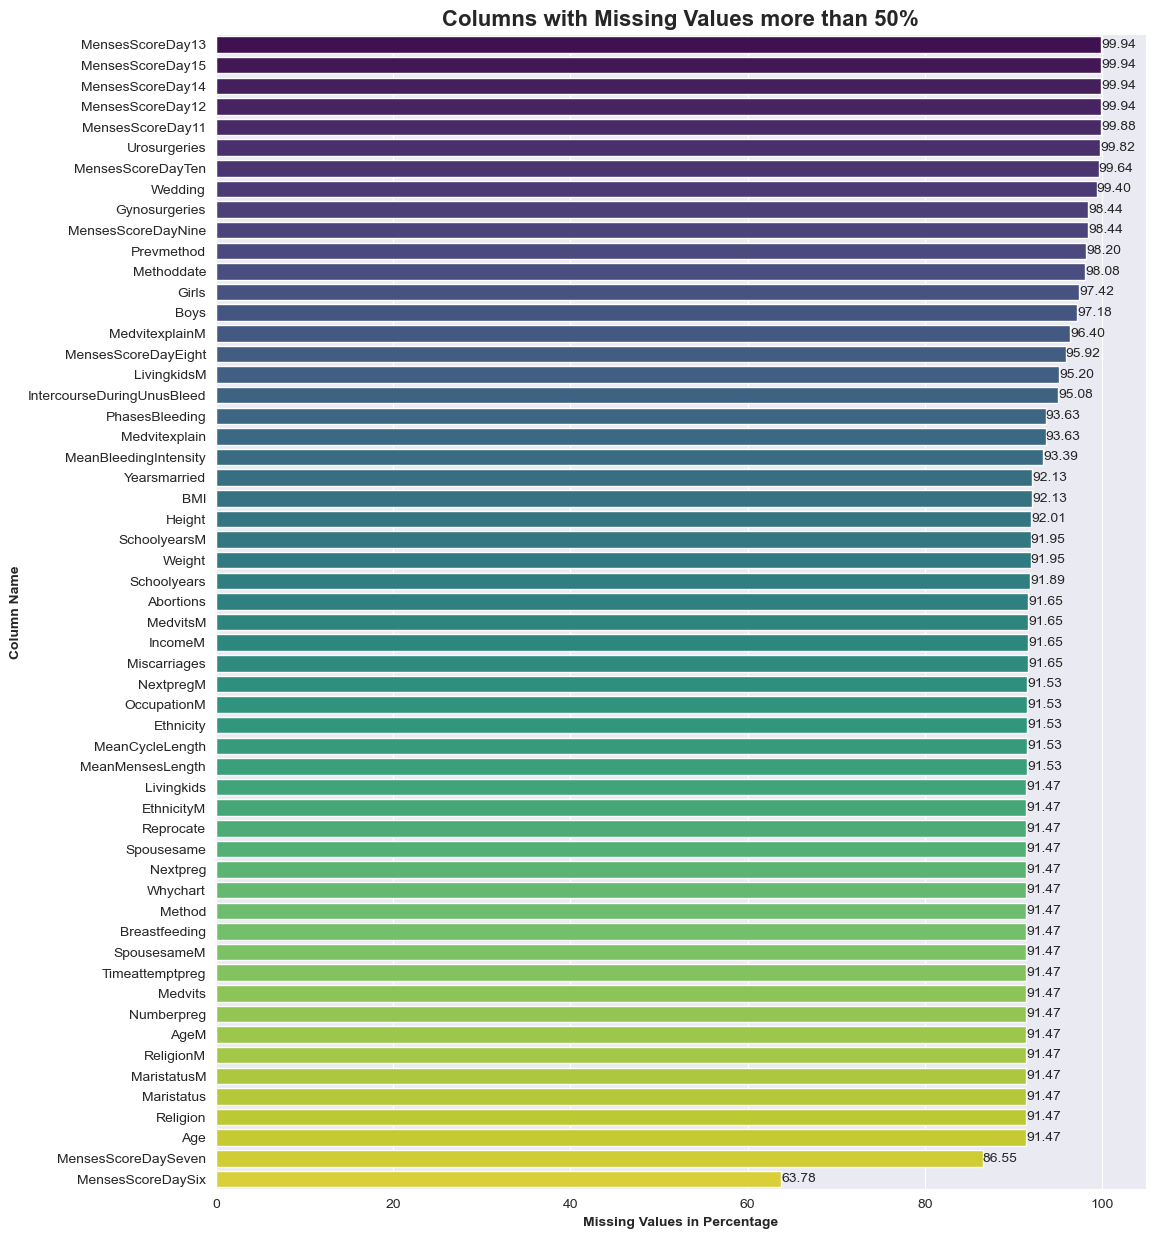

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

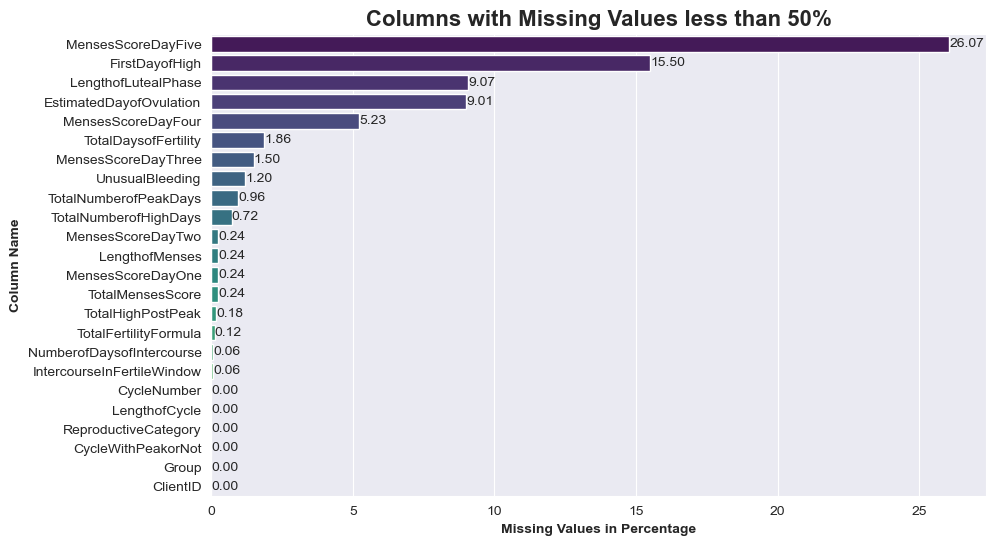

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

### Removing Columns more than 50% of missing values

In [11]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)

In [12]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,nfp8122,1,0,1,0,29,17,12,12,5,...,5,3,3,2,1,1,10,5,1,0
1,nfp8122,2,0,1,0,27,15,12,13,2,...,5,3,3,2,1,1,10,6,1,0
2,nfp8122,3,0,1,0,29,15,14,NaN,1,...,5,3,3,2,1,1,10,5,1,0
3,nfp8122,4,0,1,0,27,15,12,13,2,...,5,3,3,3,2,1,12,3,0,0
4,nfp8122,5,0,1,0,28,16,12,12,4,...,5,3,3,2,2,1,11,5,1,0


### Removing `ClientID` since it will not contribute in predicting cycle length

In [13]:
df = df.drop(columns="ClientID")

In [14]:
df.shape

(1665, 23)

In [15]:
df.dtypes

CycleNumber                    int64
Group                          int64
CycleWithPeakorNot             int64
ReproductiveCategory           int64
LengthofCycle                  int64
EstimatedDayofOvulation       object
LengthofLutealPhase           object
FirstDayofHigh                object
TotalNumberofHighDays         object
TotalHighPostPeak             object
TotalNumberofPeakDays         object
TotalDaysofFertility          object
TotalFertilityFormula         object
LengthofMenses                object
MensesScoreDayOne             object
MensesScoreDayTwo             object
MensesScoreDayThree           object
MensesScoreDayFour            object
MensesScoreDayFive            object
TotalMensesScore              object
NumberofDaysofIntercourse     object
IntercourseInFertileWindow    object
UnusualBleeding               object
dtype: object

### Separating categorical and numerical cols:

In [16]:
categorical_columns = df.select_dtypes(include= object).columns
categorical_columns

Index(['EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding'],
      dtype='object')

### Data Visualization:
- Checking Distribution of Data

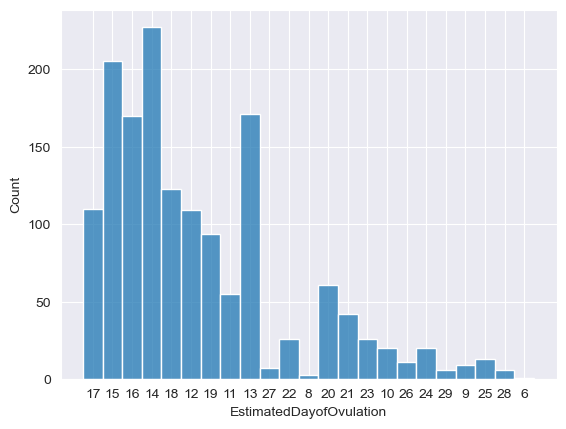

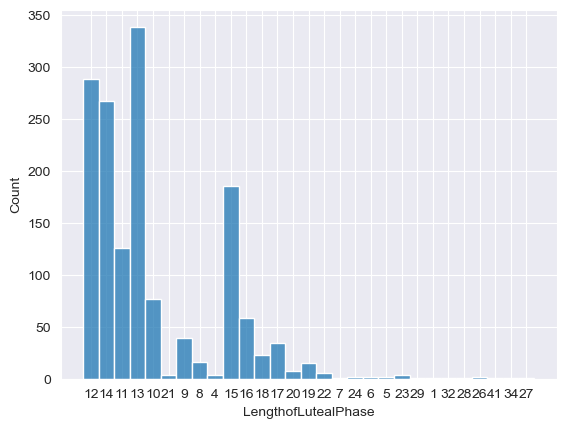

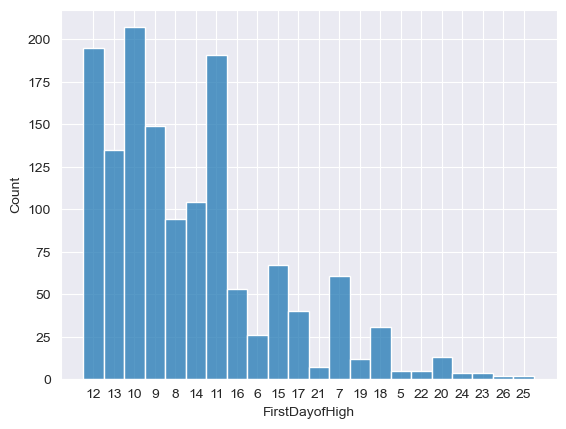

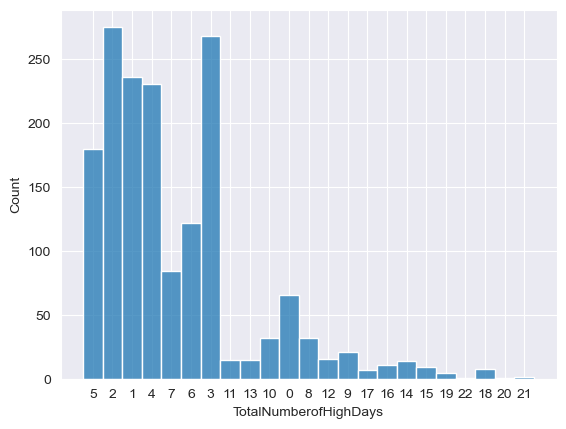

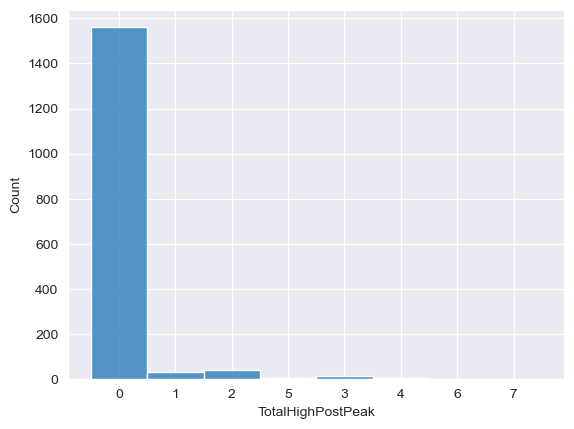

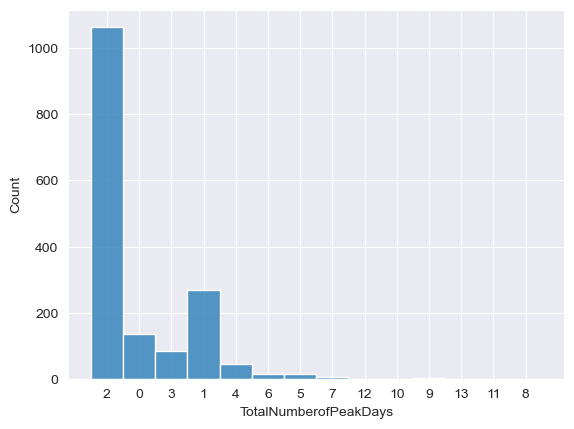

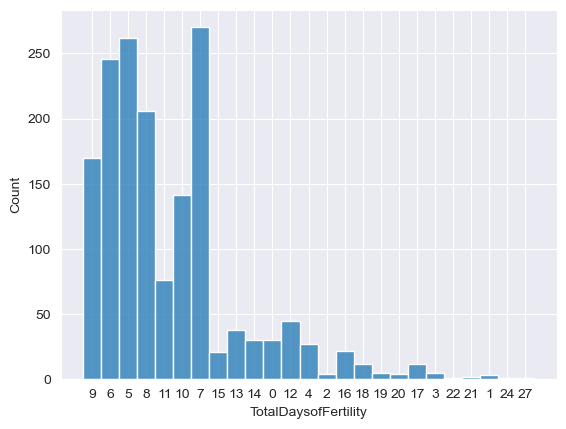

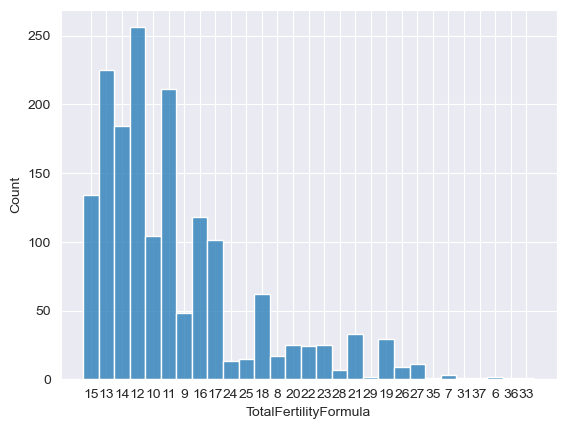

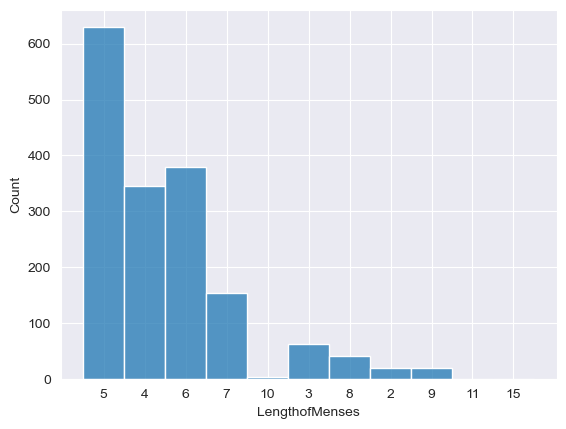

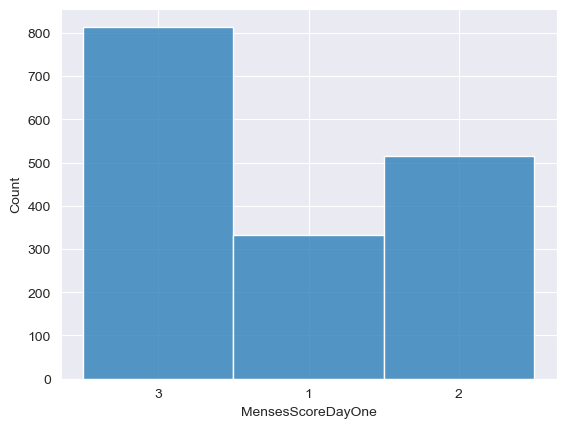

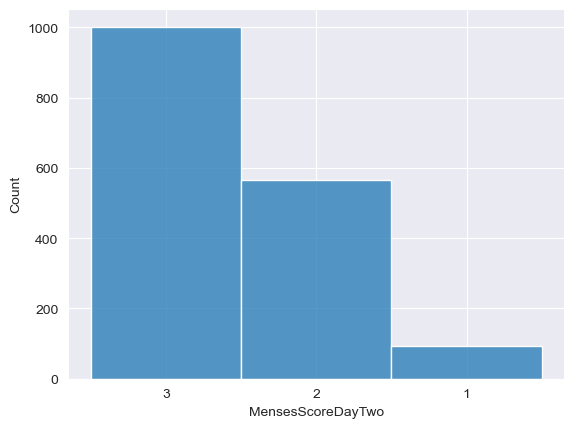

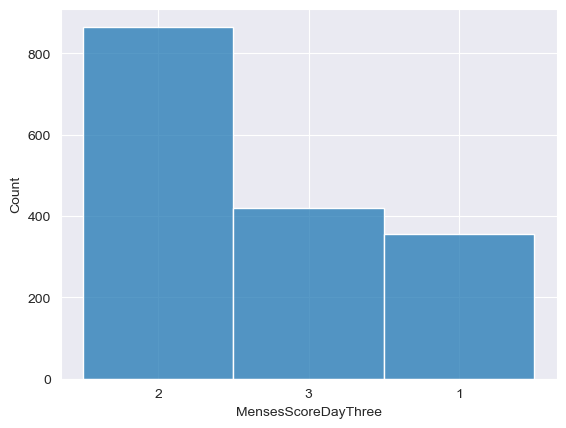

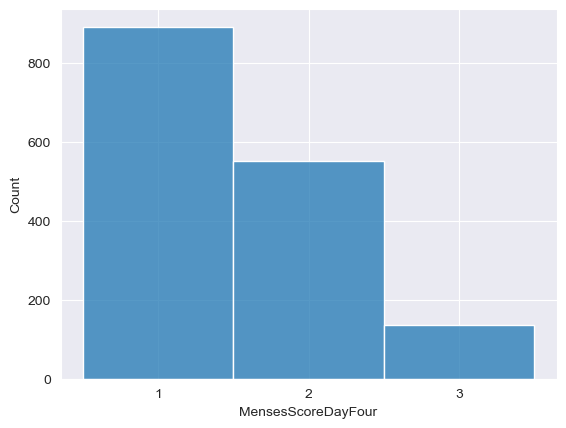

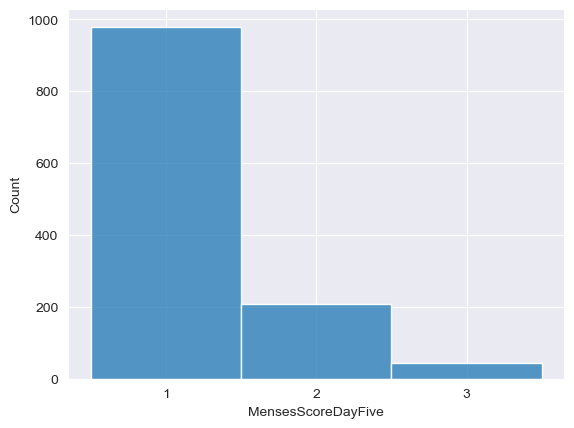

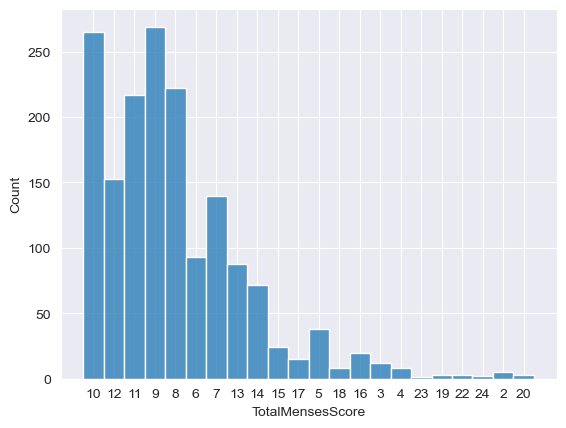

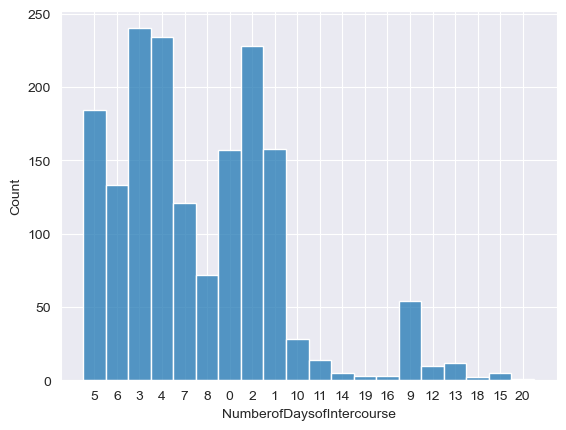

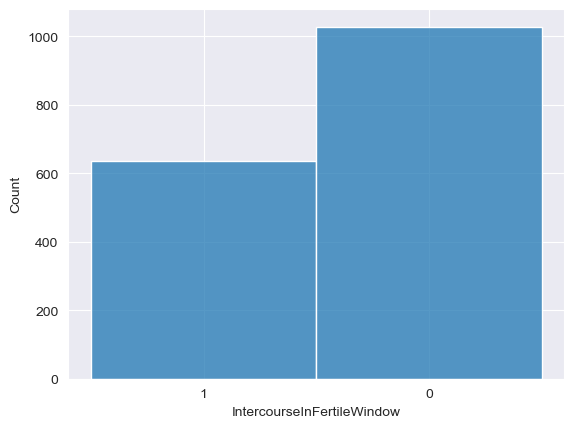

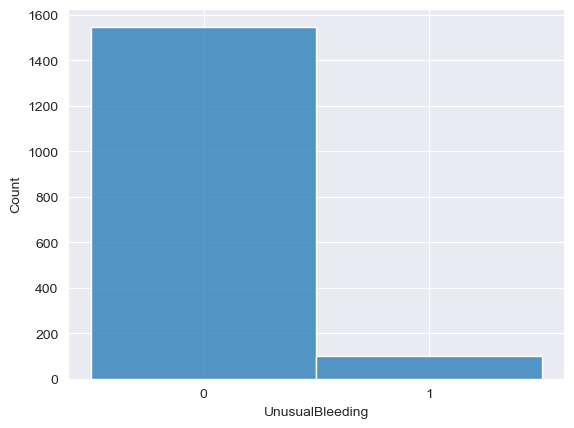

In [17]:
for i in categorical_columns:    
    sns.histplot(data=df[i])
    plt.show()

### Converting cat_cols to numerical cols:
- Using `LabelEncoder`

In [18]:
encoder = LabelEncoder()

for cols in categorical_columns:       
        df[cols] = pd.to_numeric(df[cols])
        df[cols] = encoder.fit_transform(df[cols])

In [19]:
for i in df.columns:
    if ( df[i].isnull().sum() ) > 100:
        df[i]= df[i].fillna(df[i].mean())

### Updated Dataset:

In [20]:
df.head()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0


In [21]:
df.isnull().sum()

CycleNumber                   0
Group                         0
CycleWithPeakorNot            0
ReproductiveCategory          0
LengthofCycle                 0
EstimatedDayofOvulation       0
LengthofLutealPhase           0
FirstDayofHigh                0
TotalNumberofHighDays         0
TotalHighPostPeak             0
TotalNumberofPeakDays         0
TotalDaysofFertility          0
TotalFertilityFormula         0
LengthofMenses                0
MensesScoreDayOne             0
MensesScoreDayTwo             0
MensesScoreDayThree           0
MensesScoreDayFour            0
MensesScoreDayFive            0
TotalMensesScore              0
NumberofDaysofIntercourse     0
IntercourseInFertileWindow    0
UnusualBleeding               0
dtype: int64

### Checking columns unique or duplicates 

In [22]:
# Removing/droping the duplicates
df=df.drop_duplicates()
df.head()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0


In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1660    False
1661    False
1662    False
1663    False
1664    False
Length: 1652, dtype: bool

### Note:
- There are no duplicates present now in our dataset

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1652.0,8.076877,6.603838,1.0,3.0,7.0,11.0,45.0
Group,1652.0,0.385593,0.486883,0.0,0.0,0.0,1.0,1.0
CycleWithPeakorNot,1652.0,0.913438,0.281277,0.0,1.0,1.0,1.0,1.0
ReproductiveCategory,1652.0,0.055690,0.481566,0.0,0.0,0.0,0.0,9.0
LengthofCycle,1652.0,29.321429,3.890562,18.0,27.0,29.0,31.0,54.0
EstimatedDayofOvulation,1652.0,10.214286,5.241020,0.0,7.0,9.0,12.0,23.0
LengthofLutealPhase,1652.0,11.953390,5.877480,0.0,9.0,10.0,12.0,29.0
FirstDayofHigh,1652.0,9.090194,6.243279,0.0,5.0,7.0,11.0,22.0
TotalNumberofHighDays,1652.0,4.392252,3.841328,0.0,2.0,3.0,5.0,23.0
TotalHighPostPeak,1652.0,0.148910,0.700164,0.0,0.0,0.0,0.0,8.0


### Handling Outliers:

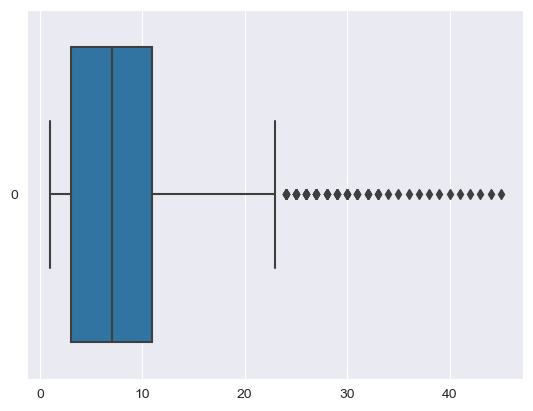

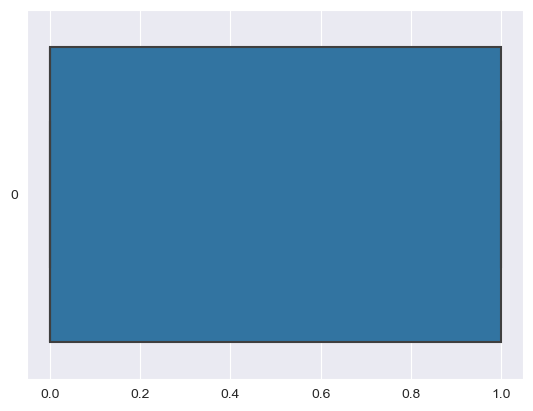

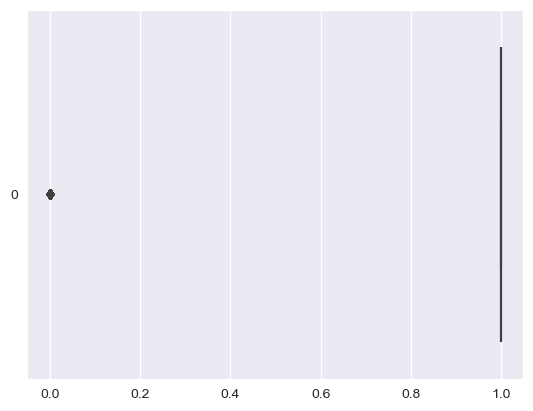

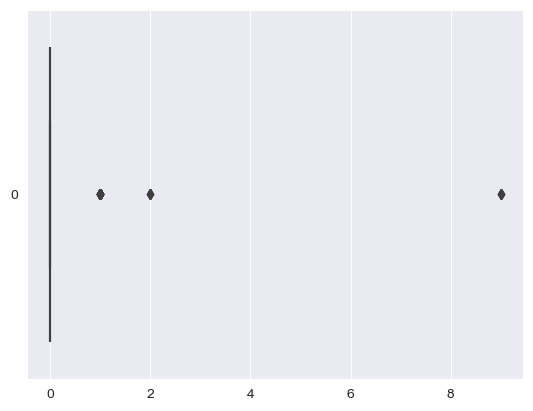

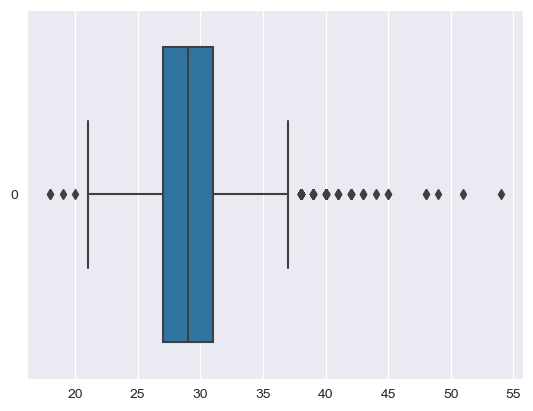

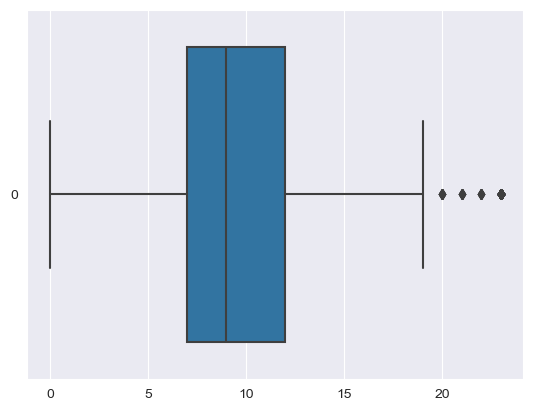

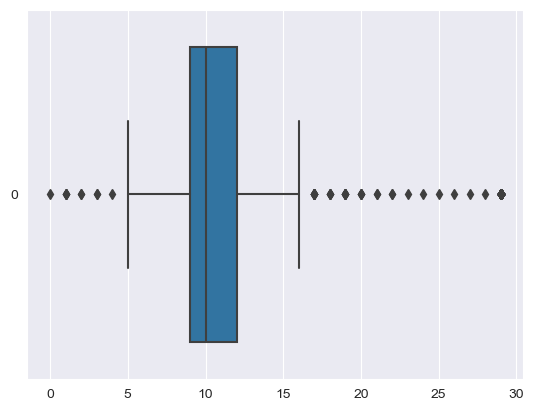

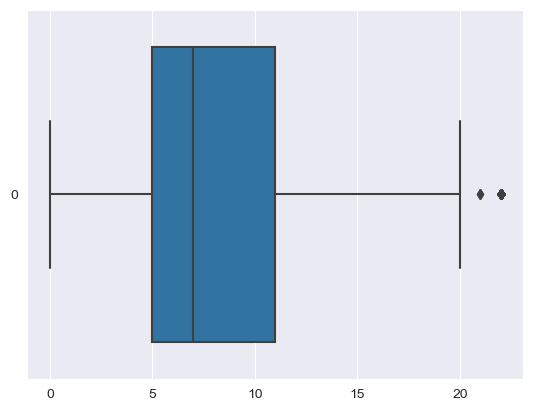

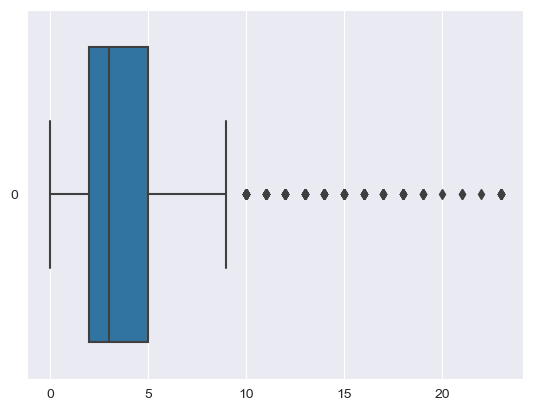

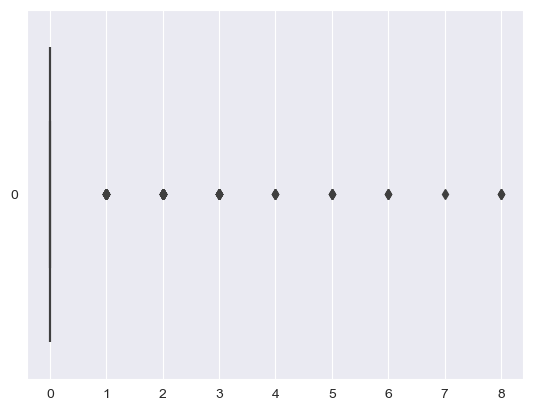

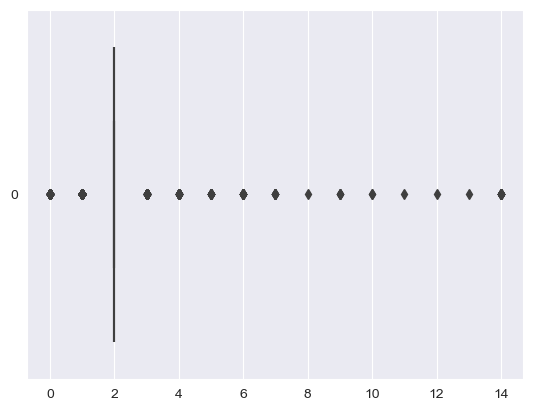

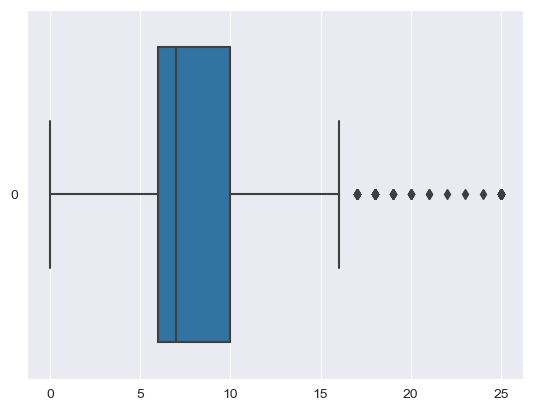

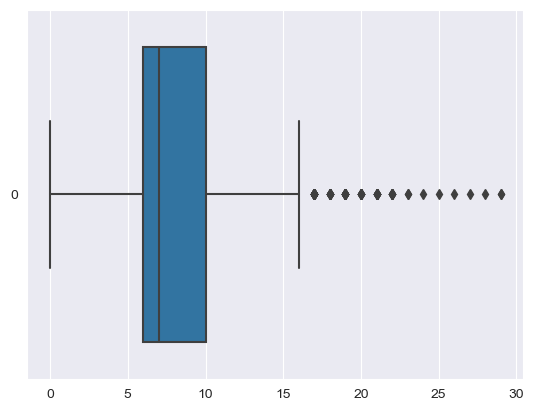

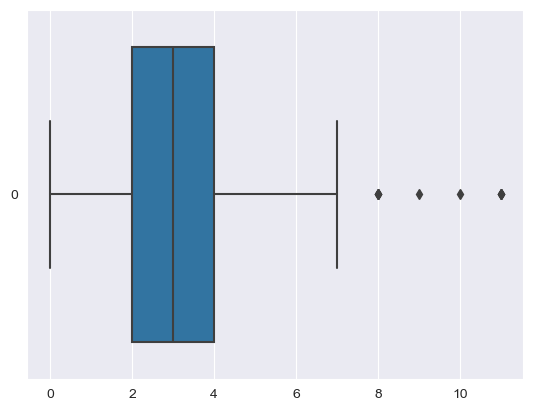

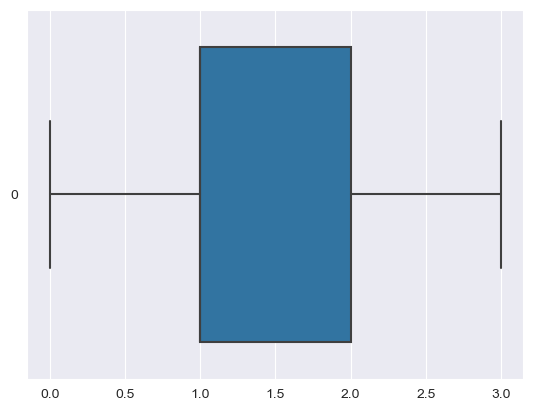

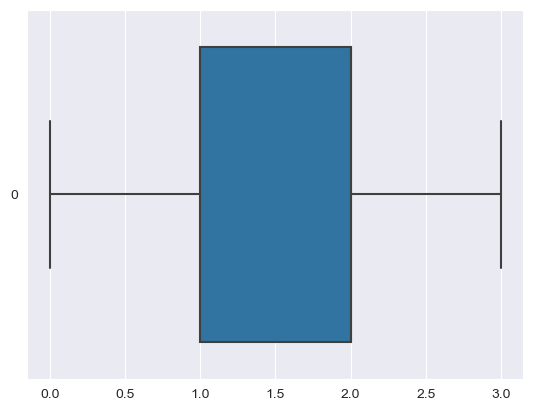

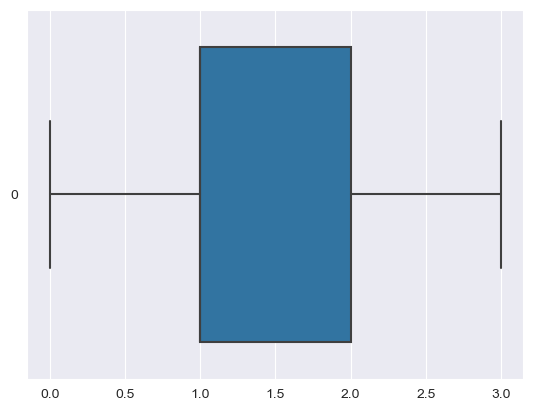

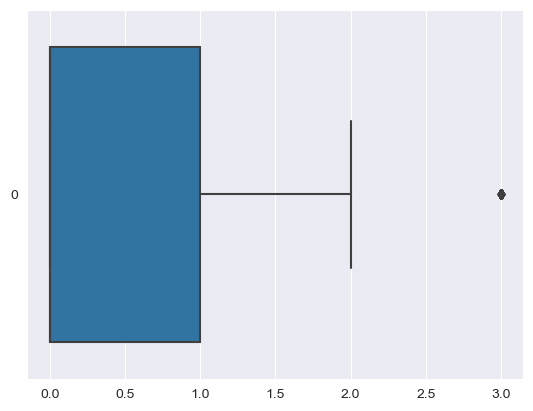

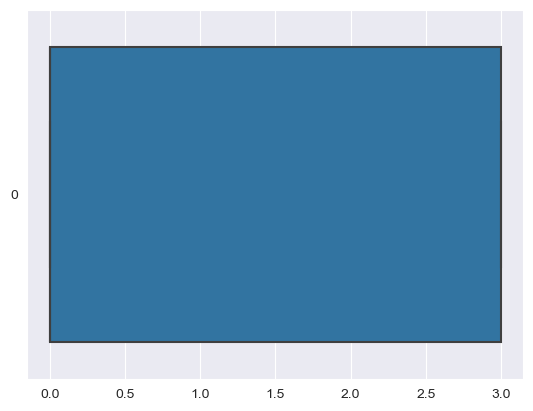

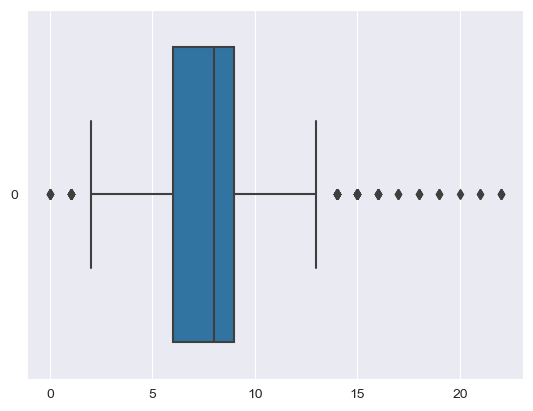

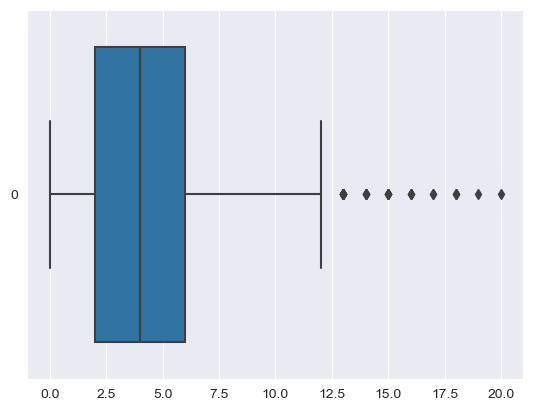

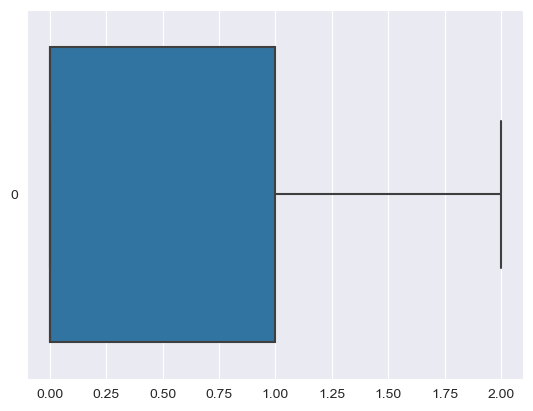

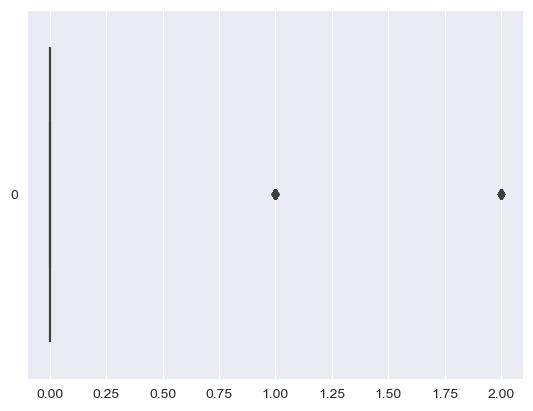

In [25]:
for cols in df.columns:
    sns.boxplot(data=df[cols] , orient='h')
    plt.show()

In [26]:
outliers_percentages = []

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_percentage = (outliers_count / len(df[col])) * 100
    
    outliers_percentages.append({'Column': col, 'Outlier Percentage': outliers_percentage})

outliers_df = pd.DataFrame(outliers_percentages)
outliers_df = outliers_df.sort_values(by='Outlier Percentage', ascending=False)


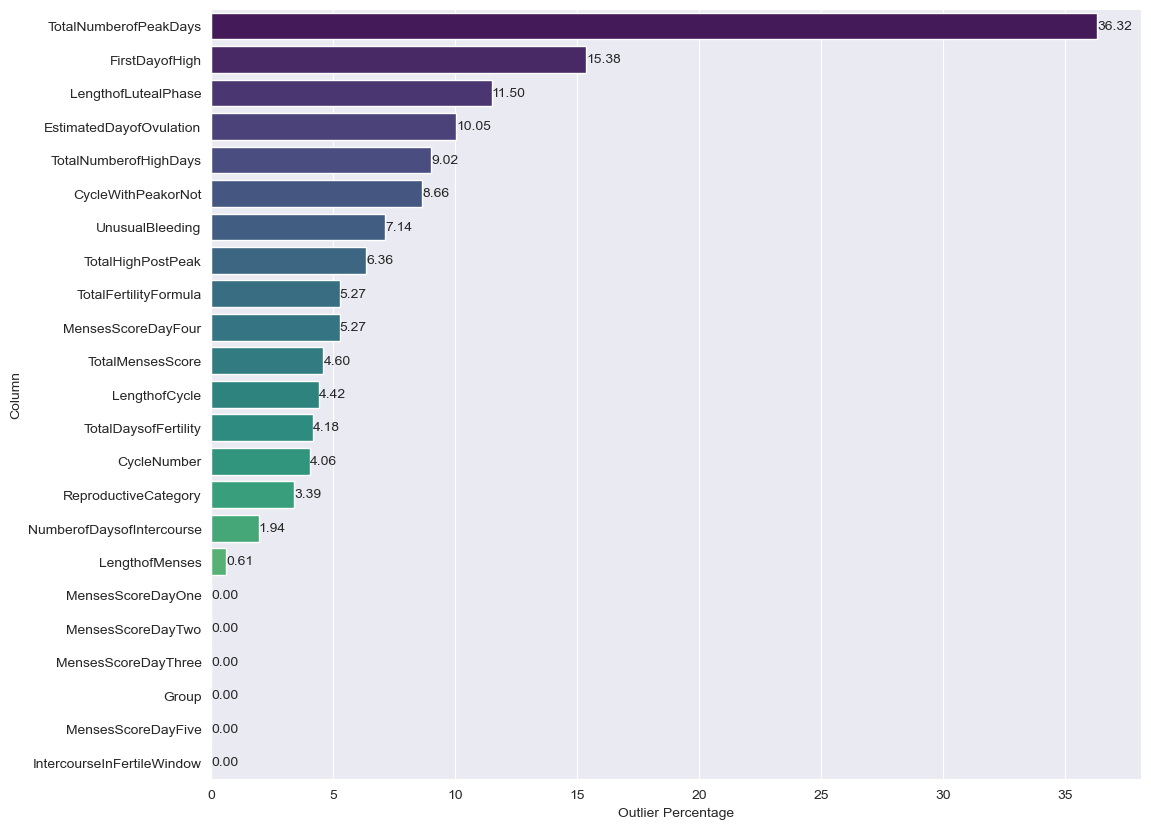

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
ax = sns.barplot(data= outliers_df , x="Outlier Percentage", y= "Column" , palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.show()

In [28]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Calculate outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_percentage = outliers.mean() * 100
    
    
    df[col] = df[col].where(~outliers, np.mean(df[col]))
    

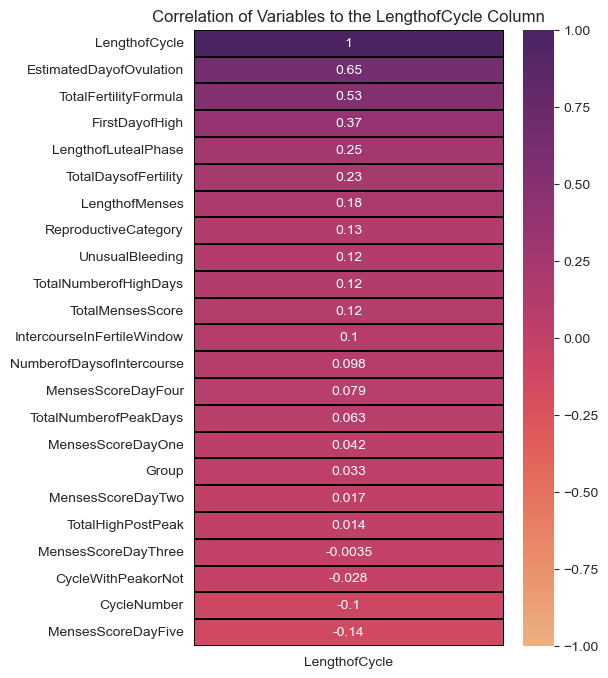

In [29]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['LengthofCycle'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the LengthofCycle Column')
plt.show()


- Since Variables in our dataset do not have strong correlation with target variable, Traditional linear models like linear regression might not perform well.

### Separating features and Target variables:

In [30]:
y = df["LengthofCycle"]
x = df.drop('LengthofCycle', axis=1)

In [31]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [32]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,
train_size=0.8, random_state= 42)

In [33]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1321, 22), (1321,), (331, 22), (331,))

### Modelling:
- create
- fit and transform
- predict

### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
random_forest = RandomForestRegressor(n_estimators= 49, 
criterion="squared_error", max_depth= 67)

In [36]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=67, n_estimators=49)

In [37]:
y_pred = random_forest.predict(x_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.2883444121288028


### XGBOOST

In [39]:
import xgboost as xgb

In [40]:
simple_reg= xgb.XGBRegressor(objective="reg:squarederror", seeds= 123)
simple_reg.fit(x_train,y_train)

y_pred = simple_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.2625074868751491


### Hyperparameter Tuning:

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param={
    "eta" : [0.1, 0.2, 0.3],
    "max_depth" : [10, 50, 100],
    "subsample" : [0.8, 0.9, 1.0],
    "colsample_bytree" : [0.8, 0.9, 1.0],
    'gamma' : [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]   
}

In [ ]:
xg_reg =xgb.XGBRegressor(objective="reg:squarederror")

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param, verbose= 1, cv= 2, scoring="neg_mean_squared_error", n_jobs= -1)
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_

print(f"best parameters: {best_params}")
print(f"best rmse from cv: {grid_search.best_score_} \n")

Fitting 2 folds for each of 5184 candidates, totalling 10368 fits


In [ ]:
best_xgb_reg = grid_search.best_estimator_
y_pred = best_xgb_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Rmse with test data: {rmse}")